Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB
None

Summary Statistics:
               Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.32000

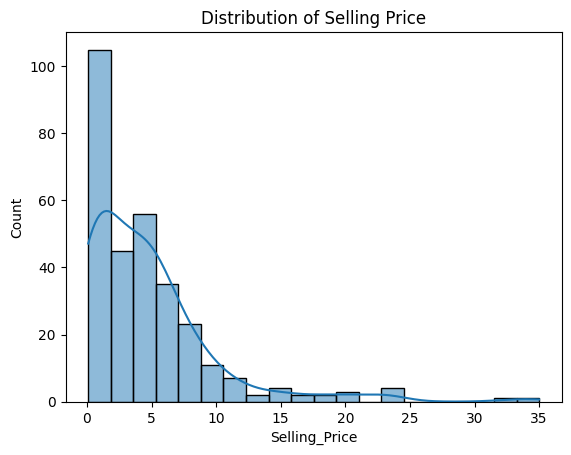

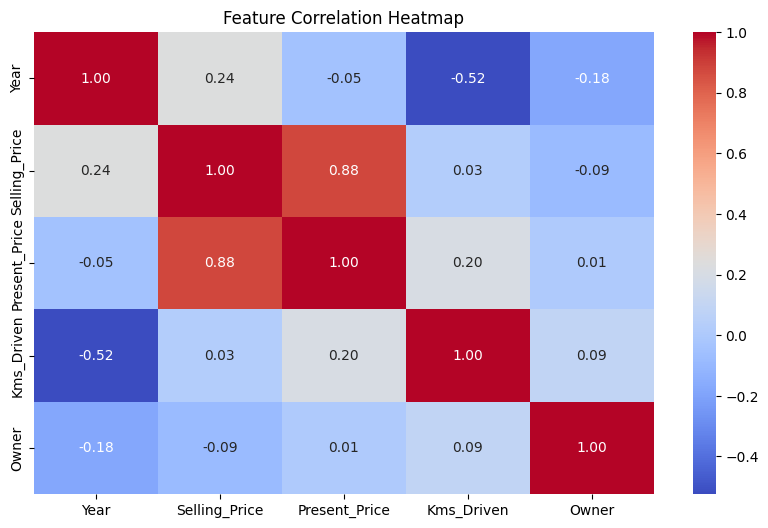

MAE: 0.61, RMSE: 0.94, R2 Score: 0.96


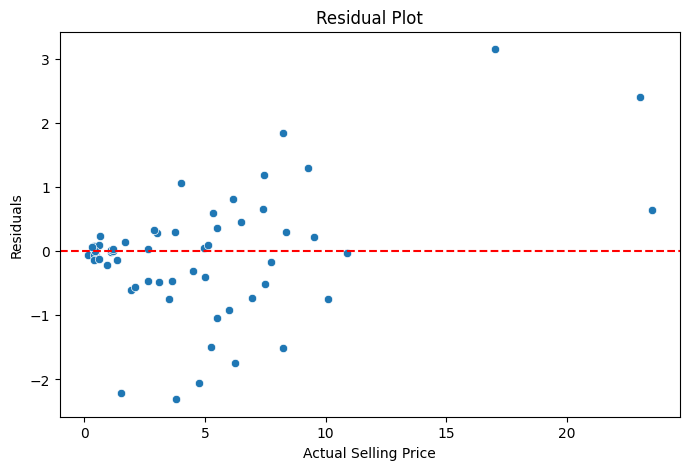

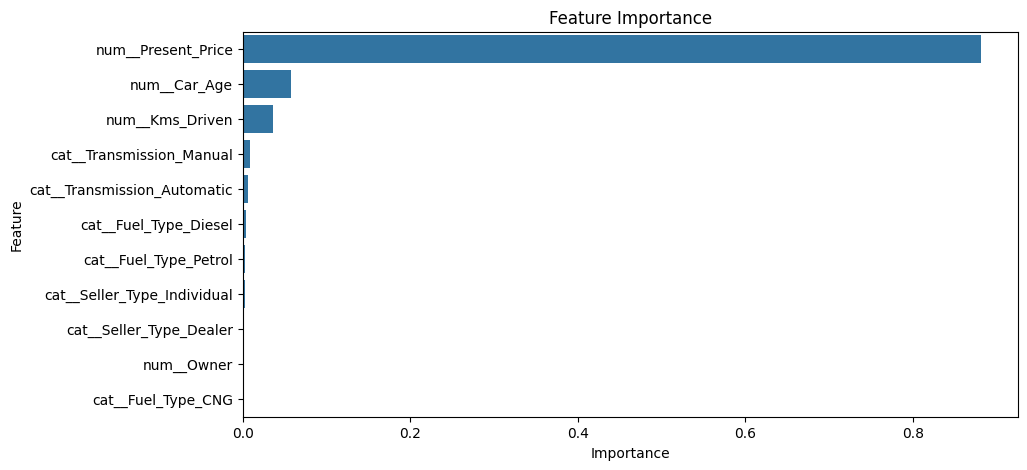

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("/content/car.csv")

# Drop non-numeric and irrelevant columns
df.drop(columns=['Car_Name'], inplace=True)

# Dataset Analysis
print("Dataset Info:\n")
print(df.info())
print("\nSummary Statistics:\n", df.describe())
print("\nMissing Values:\n", df.isnull().sum())

# Distribution of Target Variable
sns.histplot(df['Selling_Price'], bins=20, kde=True)
plt.title("Distribution of Selling Price")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Convert Year to Car Age
df['Car_Age'] = 2025 - df['Year']
df.drop(columns=['Year'], inplace=True)

# Define features and target
X = df.drop(columns=['Selling_Price'])
y = df['Selling_Price']

# Define preprocessing steps
numeric_features = ['Present_Price', 'Kms_Driven', 'Owner', 'Car_Age']
categorical_features = ['Fuel_Type', 'Seller_Type', 'Transmission']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore', dtype=np.float32))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Train model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2 Score: {r2:.2f}")

# Residual Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_test - y_pred)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Selling Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Feature Importance
feature_importance = model.named_steps['regressor'].feature_importances_
feature_names = preprocessor.get_feature_names_out()
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'])
plt.title("Feature Importance")
plt.show()
